## Image Classification with CIFAR-10

### Information on CIFAR-10 Dataset
CIFAR-10: https://www.cs.toronto.edu/~kriz/cifar.html
- CIFAR-10 contains 60000 images of 32x32 pixels in 3 channels divided by 10 classes.
- Each class contains 6000 images

### Import the libraries we'll use

In [ ]:
# Import the libraries we'll use below.
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

#plots
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

#tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from tensorflow.keras.layers import BatchNormalization
from keras import metrics
from keras import utils

!pip install visualkeras
import visualkeras
from tensorflow.keras.utils import plot_model

%matplotlib inline

#Import CIFAR-10, CIFAR-100 Classification
from keras.datasets import cifar10, cifar100

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 kB 19.9 MB/s eta 0:00:00


### Check Runtime Resources





In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Apr 13 19:08:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    45W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


## CIFAR-10: Import & Exploratory Data Analysis

In [ ]:
# load training and testing datasets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  # or cifar100.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)

print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [ ]:
# Pixel values range from 0 to 255. To normalize the data, just divide all values by 255.
x_train = x_train / 255
x_test = x_test / 255

# Flatten Y_train and Y_test, so they become vectors of label values.
# The label for X_train[0] is in Y_train[0].
y_train = y_train.flatten()
y_test = y_test.flatten()

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(x_train.shape[0])
shuffled_indices = np.random.permutation(indices)
x_train = x_train[shuffled_indices]
y_train = y_train[shuffled_indices]

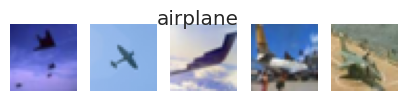

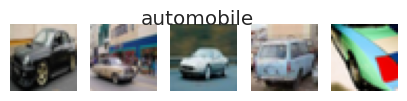

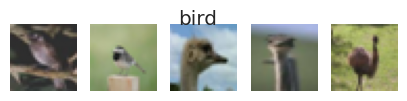

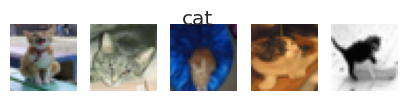

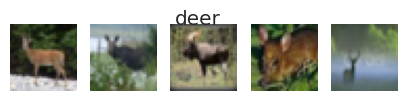

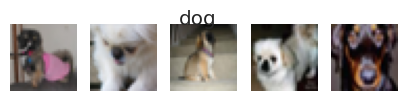

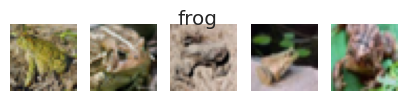

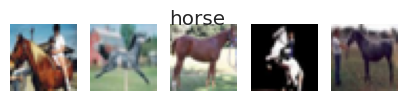

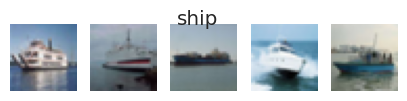

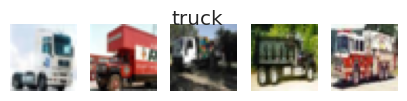

In [ ]:
for i in range(len(label_names)):
    # Get the first 5 images of the class
    images = x_train[y_train == i][:5]
    # Plot the images
    fig, axs = plt.subplots(1, 5, figsize=(5,1))
    fig.suptitle(label_names[i])
    for j in range(5):
        axs[j].imshow(images[j])
        axs[j].axis('off')
    # Loop thru printing out plots
    plt.show()

## Train and Test Neural Network Architectures

## Build Feedforward Neural Network Model
Create a placeholder function for building a neural net

In [ ]:
def build_model(n_classes,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.1):
  """Build a model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  # YOUR CODE HERE
  model = keras.Sequential()
  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [ ]:
model = build_model(len(label_names), learning_rate=0.01, hidden_layer_sizes=[1024])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=20,
  batch_size=64,
  validation_split=0.1,
  verbose=1)

display(pd.DataFrame(history.history))
print(model.summary())

Epoch 1/20
704/704 [==============================] - 8s 3ms/step - loss: 1.9651 - accuracy: 0.3200 - val_loss: 1.8251 - val_accuracy: 0.3444
Epoch 2/20
704/704 [==============================] - 2s 3ms/step - loss: 1.7100 - accuracy: 0.3864 - val_loss: 1.7872 - val_accuracy: 0.3498
Epoch 3/20
704/704 [==============================] - 2s 3ms/step - loss: 1.6297 - accuracy: 0.4194 - val_loss: 1.6434 - val_accuracy: 0.4248
Epoch 4/20
704/704 [==============================] - 2s 3ms/step - loss: 1.5783 - accuracy: 0.4390 - val_loss: 1.5839 - val_accuracy: 0.4450
Epoch 5/20
704/704 [==============================] - 2s 3ms/step - loss: 1.5349 - accuracy: 0.4553 - val_loss: 1.5836 - val_accuracy: 0.4358
Epoch 6/20
704/704 [==============================] - 2s 3ms/step - loss: 1.5098 - accuracy: 0.4648 - val_loss: 1.5774 - val_accuracy: 0.4444
Epoch 7/20
704/704 [==============================] - 2s 3ms/step - loss: 1.4832 - accuracy: 0.4737 - val_loss: 1.5691 - val_accuracy: 0.4488
Epoch 

,loss,accuracy,val_loss,val_accuracy
0,1.965111,0.319956,1.825145,0.3444
1,1.710004,0.386400,1.787167,0.3498
2,1.629734,0.419444,1.643384,0.4248
3,1.578301,0.439022,1.583878,0.4450
4,1.534858,0.455311,1.583611,0.4358
5,1.509801,0.464844,1.577373,0.4444
6,1.483171,0.473711,1.569090,0.4488
7,1.455122,0.483467,1.511428,0.4678
8,1.438895,0.489889,1.568549,0.4526
9,1.421783,0.495067,1.541612,0.4570


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 3,157,002
Trainable params: 3,157,002
Non-trainable params: 0
_________________________________________________________________
None


### Plot FNN Model Training & Validation Accuracy, Evaluate Model Against Test Data

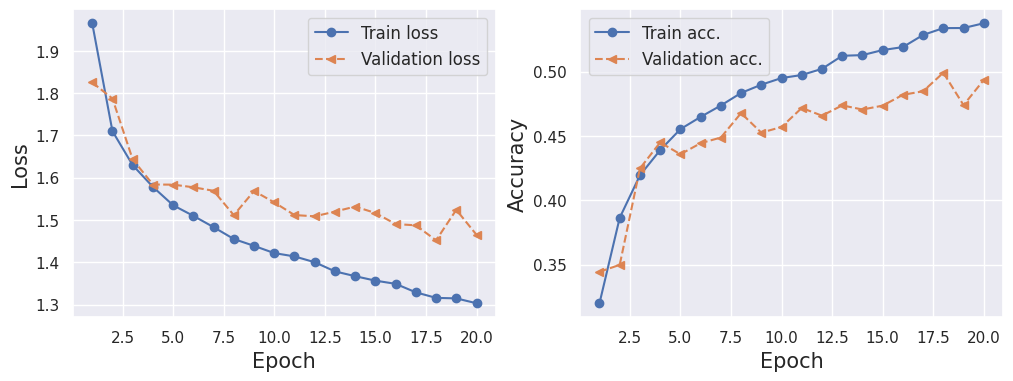

In [ ]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [ ]:
test_results = model.evaluate(x_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 1.4435 - accuracy: 0.4931

Test Acc. 49.31%


In [ ]:
# Get labels by taking the argmax -- the index with the largest probability.
test_predictions = np.argmax(model.predict(x_test), axis=-1)
print(test_predictions)

313/313 [==============================] - 1s 1ms/step
[3 9 8 ... 5 2 4]


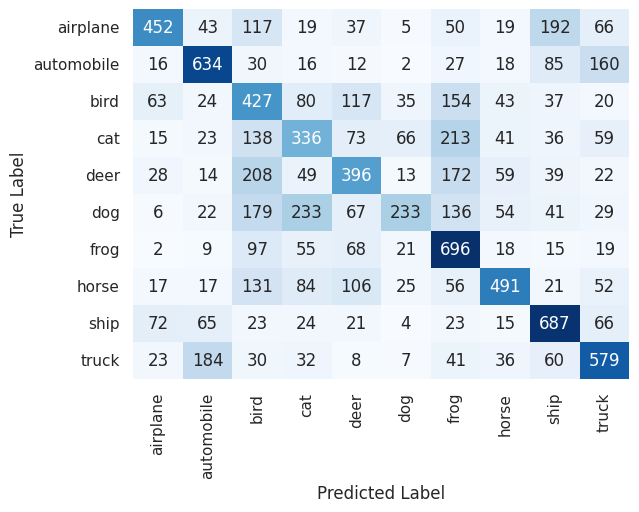

In [ ]:
# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(y_test, test_predictions)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                 xticklabels=label_names, yticklabels=label_names, cbar=False)

# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

## Build CNN Model 1

Differences from FFNN to CNN Model 1
1.   Add two distinct Conv2D and MaxPool2D Layers
2.   Add dropout layer after fully connected dense layer



In [ ]:
def build_cnn_model(n_classes,
                hidden_layer_sizes=[1024],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.1):
  """Build a neural network model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = keras.Sequential()
    
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation))
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
    
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation))
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  
  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [ ]:
model = build_cnn_model(len(label_names), learning_rate=0.01, hidden_layer_sizes=[1024])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=20, #increase training size
  batch_size=64,
  validation_split=0.1,
  verbose=1)

display(pd.DataFrame(history.history))
print(model.summary())

Epoch 1/20
704/704 [==============================] - 9s 4ms/step - loss: 1.5986 - accuracy: 0.4171 - val_loss: 1.3816 - val_accuracy: 0.5036
Epoch 2/20
704/704 [==============================] - 3s 4ms/step - loss: 1.2764 - accuracy: 0.5449 - val_loss: 1.2922 - val_accuracy: 0.5418
Epoch 3/20
704/704 [==============================] - 3s 4ms/step - loss: 1.1329 - accuracy: 0.6004 - val_loss: 1.1607 - val_accuracy: 0.5920
Epoch 4/20
704/704 [==============================] - 3s 4ms/step - loss: 1.0282 - accuracy: 0.6402 - val_loss: 1.0223 - val_accuracy: 0.6384
Epoch 5/20
704/704 [==============================] - 3s 4ms/step - loss: 0.9320 - accuracy: 0.6744 - val_loss: 0.9615 - val_accuracy: 0.6694
Epoch 6/20
704/704 [==============================] - 3s 4ms/step - loss: 0.8632 - accuracy: 0.6951 - val_loss: 0.9554 - val_accuracy: 0.6662
Epoch 7/20
704/704 [==============================] - 3s 4ms/step - loss: 0.8062 - accuracy: 0.7166 - val_loss: 0.9485 - val_accuracy: 0.6784
Epoch 

,loss,accuracy,val_loss,val_accuracy
0,1.598559,0.417111,1.381578,0.5036
1,1.276378,0.544911,1.292246,0.5418
2,1.132925,0.600422,1.160675,0.5920
3,1.028164,0.640200,1.022335,0.6384
4,0.932013,0.674422,0.961465,0.6694
5,0.863202,0.695067,0.955357,0.6662
6,0.806233,0.716578,0.948471,0.6784
7,0.745414,0.734711,0.871427,0.6976
8,0.707649,0.752133,0.897980,0.6954
9,0.650144,0.770111,0.913298,0.6882


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        102464    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 1024)              1

### Plot CNN Model Training & Validation Accuracy, Evaluate Model Against Test Data

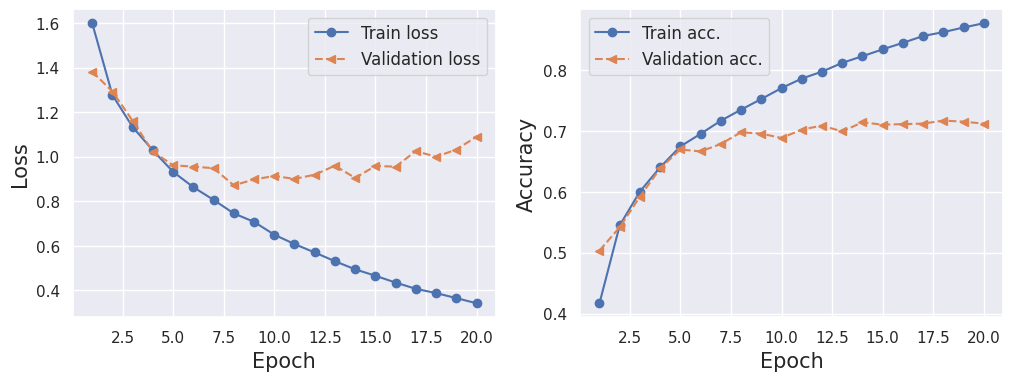

In [ ]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [ ]:
test_results = model.evaluate(x_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 1.1188 - accuracy: 0.7037

Test Acc. 70.37%


In [ ]:
# Get labels by taking the argmax -- the index with the largest probability.
test_predictions = np.argmax(model.predict(x_test), axis=-1)
print(test_predictions)

313/313 [==============================] - 1s 2ms/step
[3 8 8 ... 5 1 7]


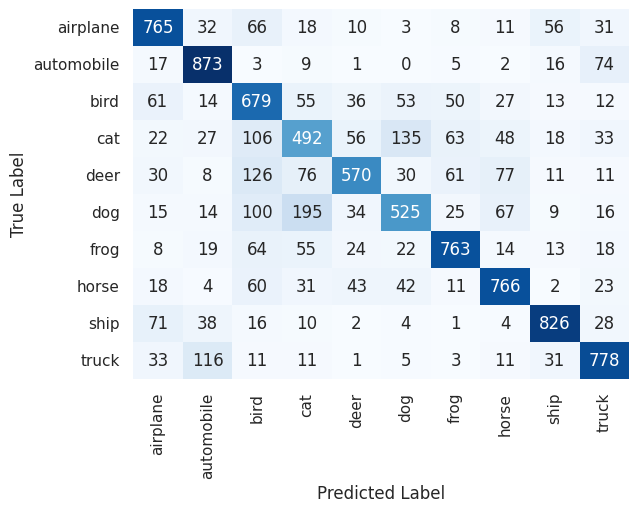

In [ ]:
# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(y_test, test_predictions)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                 xticklabels=label_names, yticklabels=label_names, cbar=False)

# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

### Visualize CNN Model 1 Layers and Plot Structure

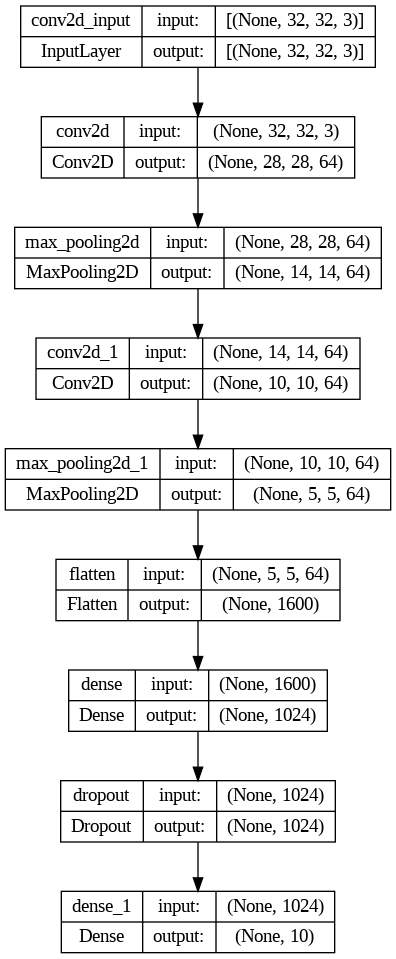

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

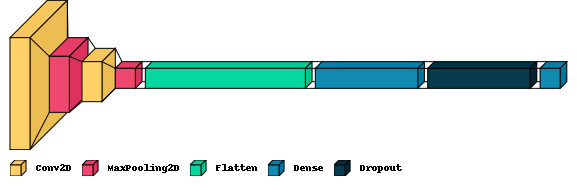

In [ ]:
visualkeras.layered_view(model, legend=True)

## Build Deeper CNN Model - CNN Model 2

Differences in CNN Model 2
1.   Add a smaller Conv2D layer so that there are two before our MaxPool layers
2.   Add Dropout layers immediately after both MaxPool2D layers
3.   Double our fully-connected Dense layers

In [ ]:
def build_cnn_model_2(n_classes,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.1):
  """Build a neural network model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = keras.Sequential()
  #double-up on convolutions and add dropouts for each layer
  model.add(keras.layers.Conv2D(filters = 32, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))  
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Conv2D(filters = 32, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))    
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [ ]:
model = build_cnn_model_2(len(label_names), learning_rate=0.01, hidden_layer_sizes=[1024, 1024])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=20, 
  batch_size=64,
  validation_split=0.1,
  verbose=1)

display(pd.DataFrame(history.history))
print(model.summary())

Epoch 1/20
704/704 [==============================] - 7s 6ms/step - loss: 1.7042 - accuracy: 0.3702 - val_loss: 1.4934 - val_accuracy: 0.4798
Epoch 2/20
704/704 [==============================] - 3s 5ms/step - loss: 1.3264 - accuracy: 0.5194 - val_loss: 1.1911 - val_accuracy: 0.5740
Epoch 3/20
704/704 [==============================] - 3s 5ms/step - loss: 1.1534 - accuracy: 0.5894 - val_loss: 1.0788 - val_accuracy: 0.6154
Epoch 4/20
704/704 [==============================] - 3s 5ms/step - loss: 1.0490 - accuracy: 0.6307 - val_loss: 0.9683 - val_accuracy: 0.6602
Epoch 5/20
704/704 [==============================] - 3s 5ms/step - loss: 0.9515 - accuracy: 0.6655 - val_loss: 0.8899 - val_accuracy: 0.6838
Epoch 6/20
704/704 [==============================] - 3s 5ms/step - loss: 0.8776 - accuracy: 0.6895 - val_loss: 0.9012 - val_accuracy: 0.6894
Epoch 7/20
704/704 [==============================] - 3s 5ms/step - loss: 0.8189 - accuracy: 0.7135 - val_loss: 0.8486 - val_accuracy: 0.7102
Epoch 

,loss,accuracy,val_loss,val_accuracy
0,1.704232,0.370244,1.493424,0.4798
1,1.326415,0.519400,1.191100,0.5740
2,1.153384,0.589378,1.078801,0.6154
3,1.049003,0.630667,0.968290,0.6602
4,0.951499,0.665533,0.889878,0.6838
5,0.877587,0.689511,0.901153,0.6894
6,0.818892,0.713511,0.848634,0.7102
7,0.767605,0.728756,0.823278,0.7200
8,0.714503,0.749444,0.828868,0.7156
9,0.685225,0.759333,0.833945,0.7114


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        51264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        51232     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        51264     
                                                        

### Plot CNN Model 2 Training & Validation Accuracy, Evaluate Model Against Test Data

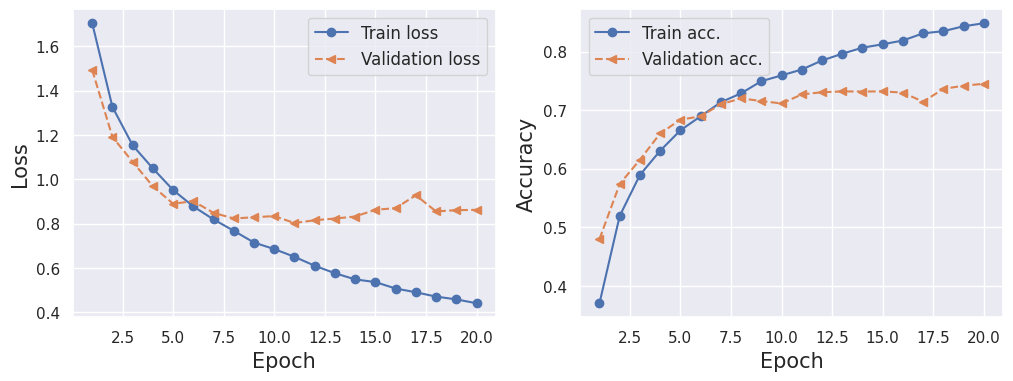

In [ ]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [ ]:
test_results = model.evaluate(x_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.8900 - accuracy: 0.7339

Test Acc. 73.39%


In [ ]:
# Get labels by taking the argmax -- the index with the largest probability.
test_predictions = np.argmax(model.predict(x_test), axis=-1)
print(test_predictions)

313/313 [==============================] - 1s 2ms/step
[5 8 8 ... 5 4 7]


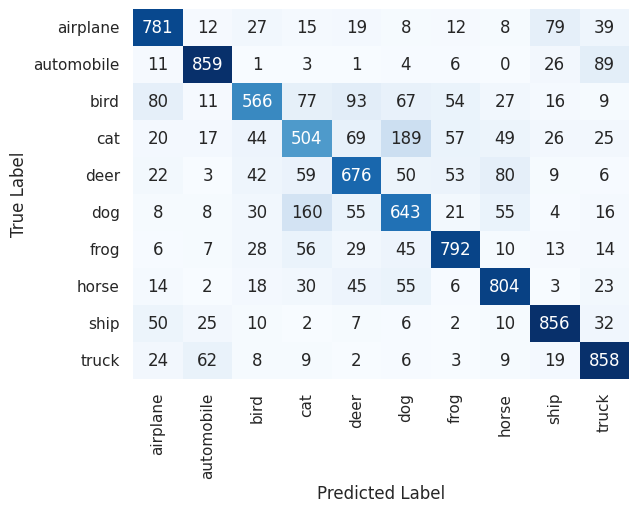

In [ ]:
# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(y_test, test_predictions)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                 xticklabels=label_names, yticklabels=label_names, cbar=False)

# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

### Visualize CNN Model 2 Layers and Plot Structure

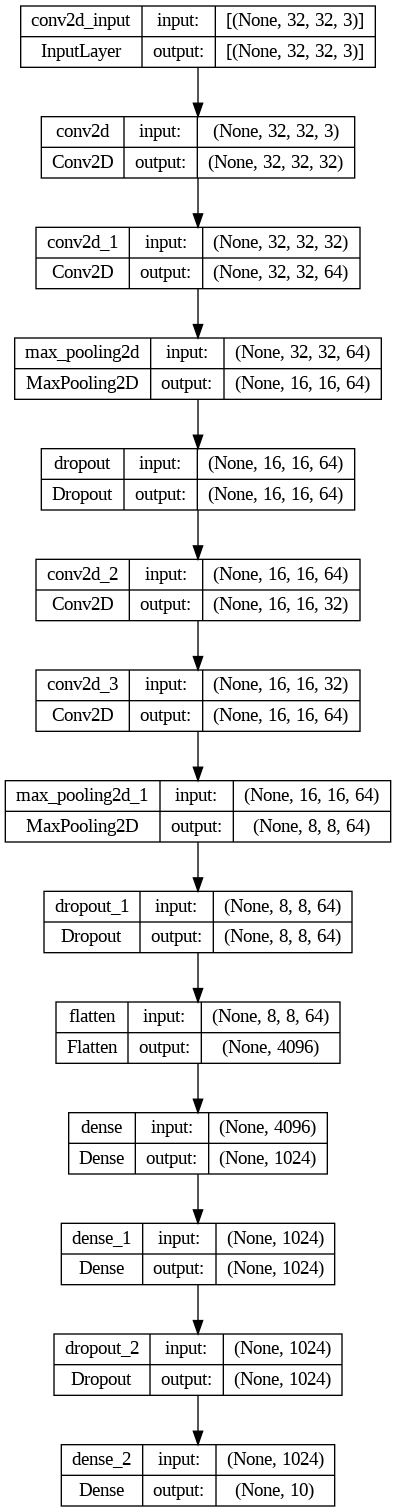

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

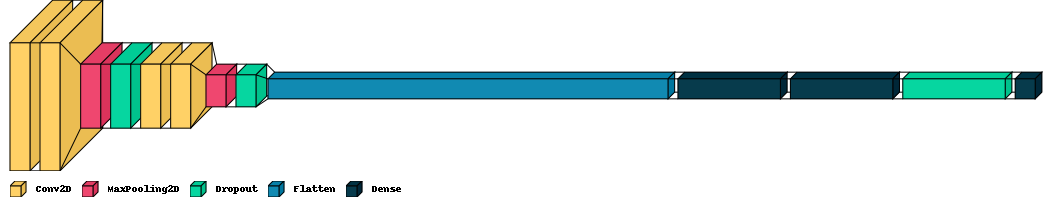

In [ ]:
visualkeras.layered_view(model, legend=True)

## Build Even Deeper CNN Model - CNN Model 3 With Batch Normalization

Differences in CNN Model 3:
1. Increase density of Conv2D layers 
2. Add BatchNormalizatoin after each Conv2D layer
3. Add another Layer of Conv2D + MaxPooling + BatchNormalization
3. Increase Training Time to 20 epochs

In [ ]:
def build_cnn_model_3(n_classes,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.1):
  """Build a neural network model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = keras.Sequential()

  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())  
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.4)) # adjust dropout layer

  model.add(keras.layers.Conv2D(filters = 128, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())  
  model.add(keras.layers.Conv2D(filters = 128, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.4)) # adjust dropout layer

  model.add(keras.layers.Conv2D(filters = 256, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())  
  model.add(keras.layers.Conv2D(filters = 256, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.4)) # adjust dropout layer

  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [ ]:
model = build_cnn_model_3(len(label_names), learning_rate=0.01, hidden_layer_sizes=[1024, 1024])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=20, #can we train a bit longer
  batch_size=64,
  validation_split=0.1,
  verbose=1)

display(pd.DataFrame(history.history))
print(model.summary())

Epoch 1/20
704/704 [==============================] - 21s 9ms/step - loss: 1.6397 - accuracy: 0.4232 - val_loss: 1.7850 - val_accuracy: 0.3994
Epoch 2/20
704/704 [==============================] - 6s 9ms/step - loss: 1.1008 - accuracy: 0.6166 - val_loss: 1.1077 - val_accuracy: 0.6314
Epoch 3/20
704/704 [==============================] - 6s 8ms/step - loss: 0.8867 - accuracy: 0.6970 - val_loss: 1.1538 - val_accuracy: 0.6466
Epoch 4/20
704/704 [==============================] - 6s 8ms/step - loss: 0.7457 - accuracy: 0.7486 - val_loss: 0.8063 - val_accuracy: 0.7238
Epoch 5/20
704/704 [==============================] - 6s 8ms/step - loss: 0.6540 - accuracy: 0.7806 - val_loss: 0.7537 - val_accuracy: 0.7560
Epoch 6/20
704/704 [==============================] - 6s 8ms/step - loss: 0.5898 - accuracy: 0.8025 - val_loss: 0.6592 - val_accuracy: 0.7842
Epoch 7/20
704/704 [==============================] - 6s 8ms/step - loss: 0.5232 - accuracy: 0.8221 - val_loss: 0.6130 - val_accuracy: 0.7988
Epoch

,loss,accuracy,val_loss,val_accuracy
0,1.639739,0.423222,1.785046,0.3994
1,1.100796,0.616556,1.107739,0.6314
2,0.886697,0.696978,1.153804,0.6466
3,0.745739,0.748556,0.806339,0.7238
4,0.653965,0.780600,0.753687,0.7560
5,0.589836,0.802489,0.659240,0.7842
6,0.523167,0.822111,0.613016,0.7988
7,0.468387,0.844600,0.699838,0.7822
8,0.418661,0.860044,0.616371,0.8072
9,0.371867,0.877200,0.594924,0.8116


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        4864      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        102464    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                        

### Plot CNN Model 3 Training & Validation Accuracy, Evaluate Model Against Test Data

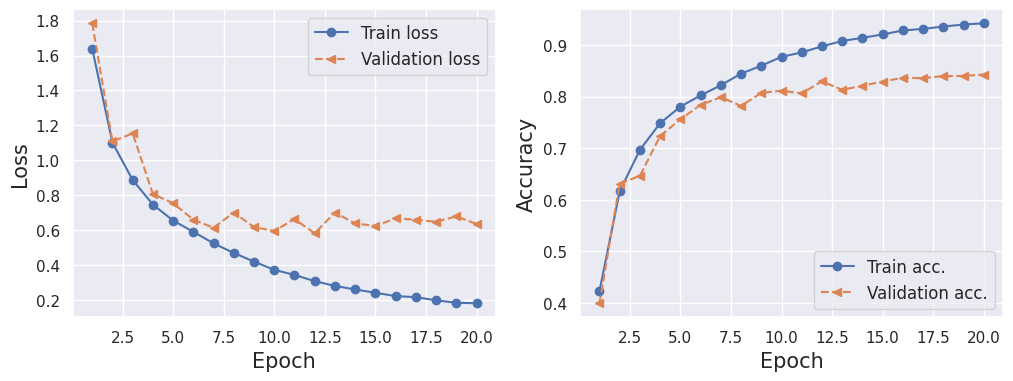

In [ ]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [ ]:
test_results = model.evaluate(x_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.6594 - accuracy: 0.8366

Test Acc. 83.66%


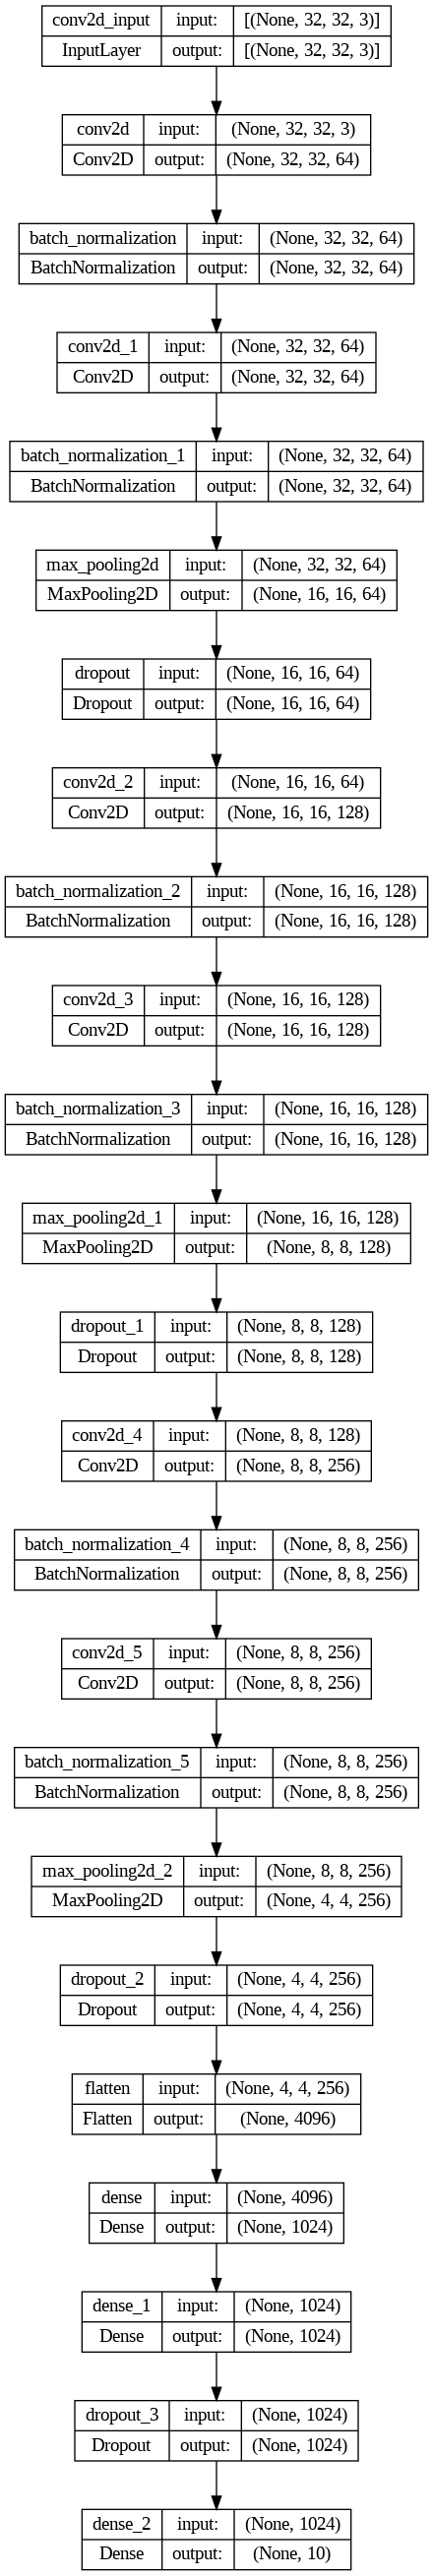

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

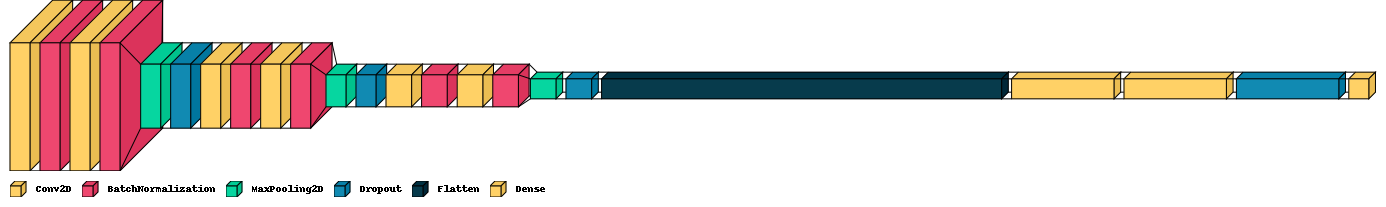

In [ ]:
visualkeras.layered_view(model, legend=True)

### Evaluate CNN Model Precision and Accuracy Metrics by Label

In [ ]:
# Get labels by taking the argmax -- the index with the largest probability.
test_predictions = np.argmax(model.predict(x_test), axis=-1)
print(test_predictions)

313/313 [==============================] - 1s 2ms/step
[3 8 8 ... 5 1 7]


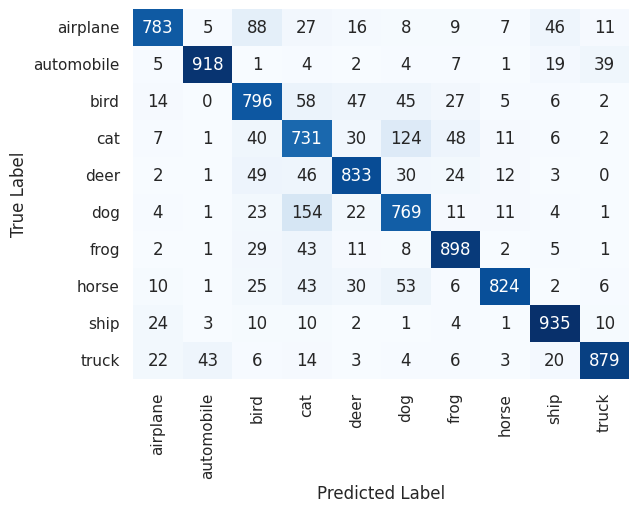

In [ ]:
# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(y_test, test_predictions)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                 xticklabels=label_names, yticklabels=label_names, cbar=False)

# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

In [ ]:
# Calculate Precision: TP / (TP+FP) ~ divide the true positives for each label by the sum down the columns (axis=0) 
for i in range(10):
    print(label_names[i], "\t", confusion_matrix[(i,i)]/tf.reduce_sum(confusion_matrix,0)[i])

airplane 	 tf.Tensor(0.8969072164948454, shape=(), dtype=float64)
automobile 	 tf.Tensor(0.9425051334702259, shape=(), dtype=float64)
bird 	 tf.Tensor(0.7460168697282099, shape=(), dtype=float64)
cat 	 tf.Tensor(0.6469026548672566, shape=(), dtype=float64)
deer 	 tf.Tensor(0.8363453815261044, shape=(), dtype=float64)
dog 	 tf.Tensor(0.7351816443594646, shape=(), dtype=float64)
frog 	 tf.Tensor(0.8634615384615385, shape=(), dtype=float64)
horse 	 tf.Tensor(0.9395667046750285, shape=(), dtype=float64)
ship 	 tf.Tensor(0.8938814531548758, shape=(), dtype=float64)
truck 	 tf.Tensor(0.9242902208201893, shape=(), dtype=float64)


In [ ]:
# Define the animal and non-animal classes
animal_indices = [2, 3, 4, 5, 6, 7]  # Indices of animal classes in the confusion matrix
non_animal_indices = [0, 1, 8, 9]  # Indices of non-animal classes in the confusion matrix

# Extract animal and non-animal confusion matrices
animal_confusion_matrix = tf.gather(confusion_matrix, indices=animal_indices, axis=0)
animal_confusion_matrix = tf.gather(animal_confusion_matrix, indices=animal_indices, axis=1)

non_animal_confusion_matrix = tf.gather(confusion_matrix, indices=non_animal_indices, axis=0)
non_animal_confusion_matrix = tf.gather(non_animal_confusion_matrix, indices=non_animal_indices, axis=1)

# Convert the confusion matrices to NumPy arrays
animal_confusion_matrix_np = animal_confusion_matrix.numpy()
non_animal_confusion_matrix_np = non_animal_confusion_matrix.numpy()

# Calculate true positives and false positives for animal and non-animal classes
animal_true_positives = np.diag(animal_confusion_matrix_np)
animal_false_positives = np.sum(animal_confusion_matrix_np, axis=0) - animal_true_positives

non_animal_true_positives = np.diag(non_animal_confusion_matrix_np)
non_animal_false_positives = np.sum(non_animal_confusion_matrix_np, axis=0) - non_animal_true_positives

# Calculate precision for animal and non-animal classes
animal_precision = np.sum(animal_true_positives) / (np.sum(animal_true_positives) + np.sum(animal_false_positives))
non_animal_precision = np.sum(non_animal_true_positives) / (np.sum(non_animal_true_positives) + np.sum(non_animal_false_positives))

print("Animal Precision:", animal_precision)
print("Non-Animal Precision:", non_animal_precision)

Animal Precision: 0.8197026022304833
Non-Animal Precision: 0.9343434343434344


label names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] 



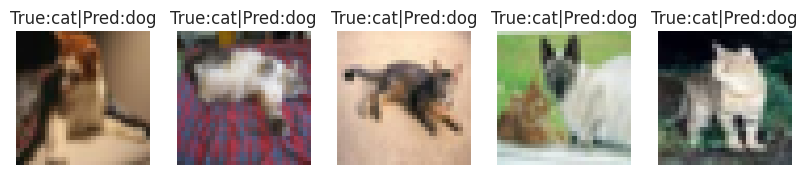

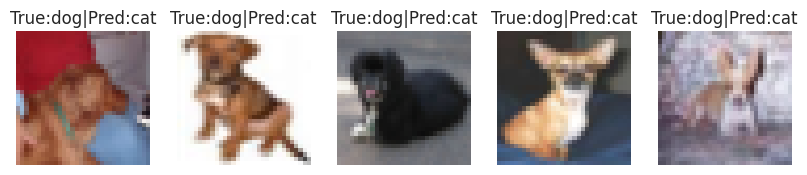

In [ ]:
print("label names:", label_names,"\n")
x_test_1 = x_test[np.logical_and(y_test==3, test_predictions==5)] #true label = 'cat', predicted label = 'dog'
x_test_2 = x_test[np.logical_and(y_test==5, test_predictions==3)] #true label = 'cat', predicted label = 'frog'

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(10,5))
for i in range(5):
  axs[i].imshow(x_test_1[i], cmap='gray')
  axs[i].set_title("True:" + label_names[3] + "|Pred:" + label_names[5])
  axs[i].axis('off')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(10,5))
for i in range(5):
  axs[i].imshow(x_test_2[i], cmap='gray')
  axs[i].set_title("True:" + label_names[5] + "|Pred:" + label_names[3])
  axs[i].axis('off')
plt.show()

## Explore Transfer Learning

### Evaluate ResNet50 Model Precision and Accuracy Metrics by Label

## Complete Conclusions and Results

MODEL | TRAINING ACCURACY | VALIDATION ACCURACY | TEST ACCURACY | #LAYERS | ACTIVATION | OPTIMIZER | #PARAMETERS | PROCESSING TIME | ANIMAL PRECISION | NON-ANIMAL PRECISION | IMAGE SIZE | BRIGHTNESS | CONTRAST FACTOR | FLIP ON TRAIN
:-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-:
FFNN | .5377 | .4936 | .4931 | 1 | relu | Adam | 3,157,002 | 40s
CNN1 | .8765 | .7118 | .7037 | 8 | relu | Adam | 1,757,002 | 60s
CNN2 | .8484 | .7450 | .7339 | 13 | relu | Adam | 5,411,370 | 60s
CNN3 | .9423 | .8428 | .8366 | 23 | relu | Adam | 8,438,858 | 80s | .8197 | .9343
CNN3 + Pre-Processing | .9756 | .9107 | .8341 | 23 | relu | Adam | 21,021,770 | 620s | .8087 | .9335 | 64x64 | 0.3 | 2 | YES
VGG16 v1 | .8035 | .7584 | .7513 |  16+4 | relu | SGD | 14,719,818 | 130s
VGG16 v2 | .8045 | .7278 | .7290 |  16+10 | relu | SGD | 15,142,858 | 140s
VGG16 v3 | .8599 | .8242 | .8293 |  16+5 | relu | SGD | 15,142,858 | 140s
VGG16 v4 | .9943 | .8612 | .8563 |  16+7 | relu | SGD | 16,299,850 | 200s | .8337 | .9388
VGG16 v4 + Pre-Processing | .9698 | .9846 | .9298 |  16+7 | relu | SGD | 17,872,714 | 2400s | .9213 | .9642 | 64x64 | 0.3 | 2 | YES
ResNet50 v1 | .9849 | .7850 | .7895 | 50+4 | relu | SGD | 24,591,242 | 1370s
ResNet50 v2 | .9789 | .8392 | .8362 | 50+8 | relu | SGD | 126,879,114 | 1400s
ResNet50 v3 | .9937 | .8176 | .8181 | 50+11 | relu | SGD | 127,286,666 | 1400s
ResNet50 v4 | .9626 | .8818 | .8740 | 50+10 | relu | Adam | 26,745,738 | 1450s | .8626 | .9490



## Summary Results for Slides

MODEL | TRAINING ACCURACY | VALIDATION ACCURACY | TEST ACCURACY | #LAYERS | ACTIVATION | OPTIMIZER | #PARAMETERS | PROCESSING TIME | ANIMAL PRECISION | NON-ANIMAL PRECISION 
:-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: 
FFNN | .5377 | .4936 | .4931 | 1 | relu | Adam | 3,157,002 | 40s
CNN1 | .8765 | .7118 | .7037 | 8 | relu | Adam | 1,757,002 | 60s
CNN2 | .8484 | .7450 | .7339 | 13 | relu | Adam | 5,411,370 | 60s
CNN3 | .9423 | .8428 | .8366 | 23 | relu | Adam | 8,438,858 | 80s | .8197 | .9343
CNN3 + Pre-Processing | .9756 | .9107 | .8341 | 23 | relu | Adam | 21,021,770 | 620s | .8087 | .9335
VGG16 v4 | .9943 | .8612 | .8563 |  16+7 | relu | SGD | 16,299,850 | 200s | .8337 | .9388
VGG16 v4 + Pre-Processing | .9698 | .9846 | .9298 |  16+7 | relu | SGD | 17,872,714 | 2400s | .9213 | .9642 
ResNet50 v4 | .9626 | .8818 | .8740 | 50+10 | relu | Adam | 26,745,738 | 1450s | .8626 | .9490

